> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [TMDB-MOVIES]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [4]:
#Installing our libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [5]:
#Loading our data and show some data
movie= pd.read_csv('tmdb-movies.csv')
movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
#Need to know our data information
movie.info

<bound method DataFrame.info of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
5      281957  tt1663202    9.110700  135000000   532950503   
6       87101  tt1340138    8.654359  155000000   440603537   
7      286217  tt3659388    7.667400  108000000   595380321   
8      211672  tt2293640    7.404165   74000000  1156730962   
9      150540  tt2096673    6.326804  175000000   853708609   
10     206647  tt2379713    6.200282  245000000   880674609   
11      76757  tt1617661    6.189369  176000003   183987723   
12     264660  tt0470752    6.118847   15000000    36869414   
13     257344  tt2120120    5.984995   88000000   243637091   
14      99861  tt239542

In [6]:
#Types of our data
movie.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
#data description
movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
#Is there any dublicated values
movie.duplicated().sum()

1

In [9]:
#Is there any null values
movie.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

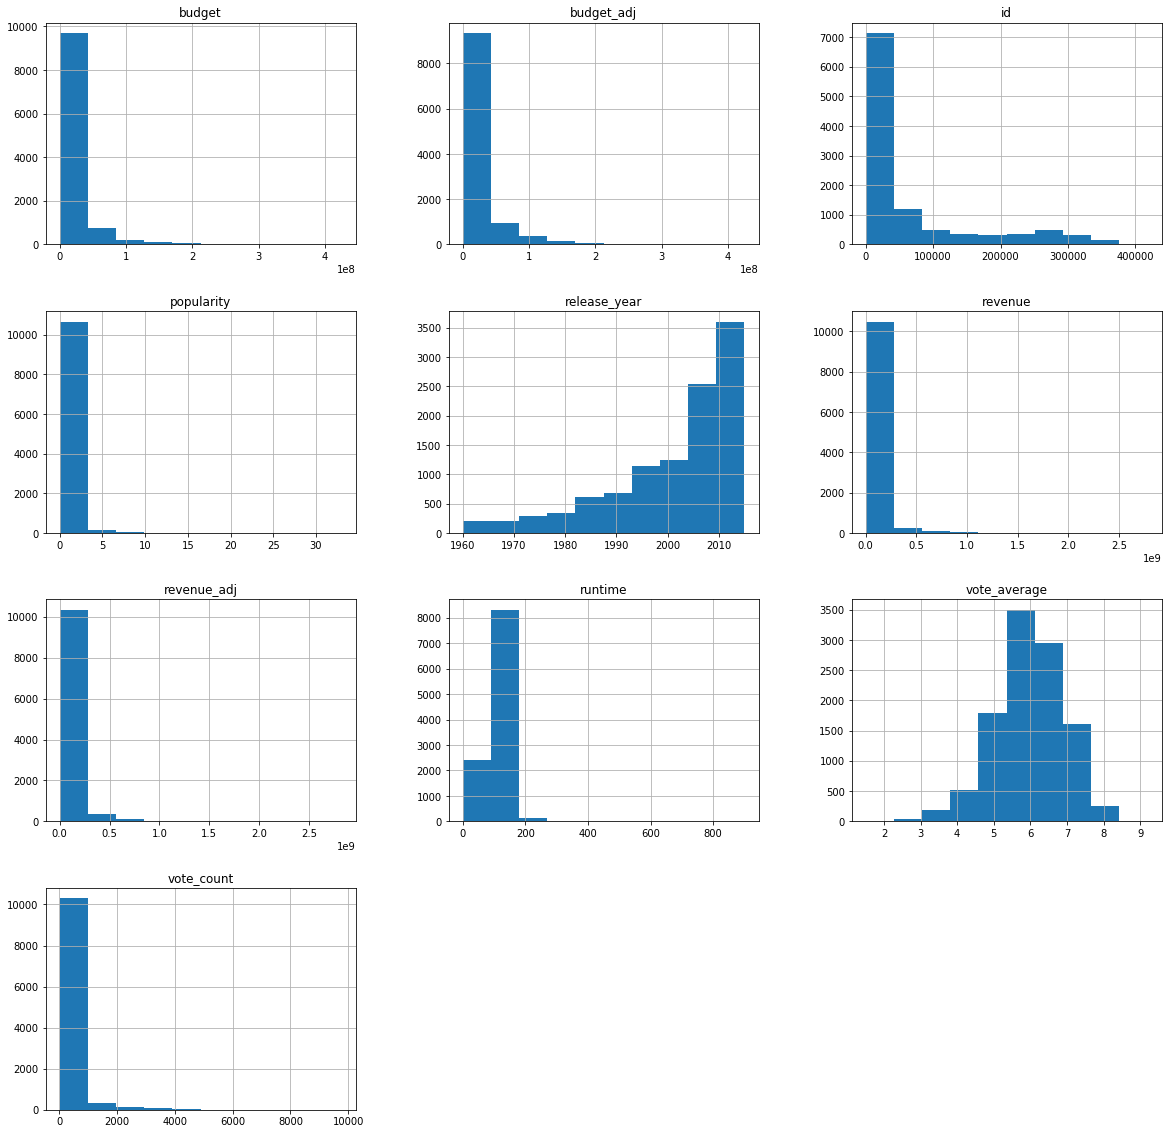

In [9]:
movie.hist(figsize=(20,20));


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [10]:
#Removing the unnecessary columns:
movie.drop(['id', 'imdb_id','popularity','homepage','director', 'tagline', 'overview','production_companies', 'director','keywords'], axis=1, inplace=True)

In [12]:
movie.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [13]:
#Removing dublicates values.
movie.drop_duplicates(inplace= True)

In [14]:
#checking duplicate again
movie.duplicated().sum()

0

In [15]:
#Removing Null values
movie.dropna(inplace=True)

In [16]:
#Checking Null Values
movie.isnull().sum()

budget            0
revenue           0
original_title    0
cast              0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [17]:
#Adjusting movie columns types:
movie['revenue'] = movie['revenue'].astype(int)
movie['budget'] = movie['budget'].astype(int)
movie.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [18]:
#Adjusting the date format
movie['release_date']=pd.to_datetime(movie['release_date'])

In [20]:
#Adding release month to use it in the analysis phase to know seasonality
movie['release_month'] = pd.DatetimeIndex(movie['release_date']).month
movie.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4


In [21]:
#Keep the hero of each film [Assuming it's the first actor]
movie['cast']= movie['cast'].str.split('|').str[0]
movie.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,150000000,1513528810,Jurassic World,Chris Pratt,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5
2,110000000,295238201,Insurgent,Shailene Woodley,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12
4,190000000,1506249360,Furious 7,Vin Diesel,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4


In [22]:
#Modifiying the Genres columns to keep the first type only as the main
movie['genres']= movie['genres'].str.split('|').str[0]
movie.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,150000000,1513528810,Jurassic World,Chris Pratt,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy,120,Action,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5
2,110000000,295238201,Insurgent,Shailene Woodley,119,Adventure,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,136,Action,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12
4,190000000,1506249360,Furious 7,Vin Diesel,137,Action,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4


In [23]:
#Need to insert profit data [Revenue-budget]
movie.insert(3, 'profit', movie['revenue']-movie['budget'])

In [24]:
movie.head()

,budget,revenue,original_title,profit,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,150000000,1513528810,Jurassic World,1363528810,Chris Pratt,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6
1,150000000,378436354,Mad Max: Fury Road,228436354,Tom Hardy,120,Action,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5
2,110000000,295238201,Insurgent,185238201,Shailene Woodley,119,Adventure,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3
3,200000000,2068178225,Star Wars: The Force Awakens,1868178225,Harrison Ford,136,Action,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12
4,190000000,1506249360,Furious 7,1316249360,Vin Diesel,137,Action,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4


In [39]:
#Now we cleaned our data, adding the columns we need and delete the un necessary columns.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Highest profits for each category)

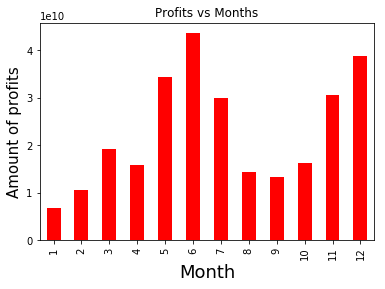

In [25]:
#Checking and creating a plot for the maximum profits for a certain month
colors=['red']
movie.groupby('release_month')['profit'].sum().plot(kind='bar',title='Profits vs Months',color=colors);
plt.xlabel('Month',fontsize=18);
plt.ylabel('Amount of profits',fontsize=15);

In [32]:
#Month June is the highest.

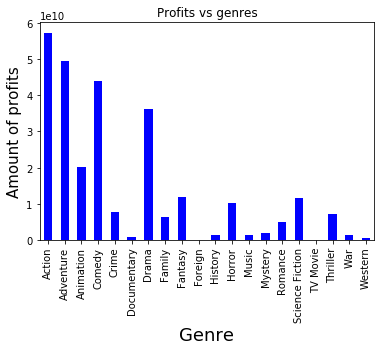

In [31]:
#Highest Genres
colors=['blue']
movie.groupby('genres')['profit'].sum().plot(kind='bar',title='Profits vs genres',color=colors);
plt.xlabel('Genre',fontsize=18);
plt.ylabel('Amount of profits',fontsize=15);

In [ ]:
#Action is the highest genre for profits

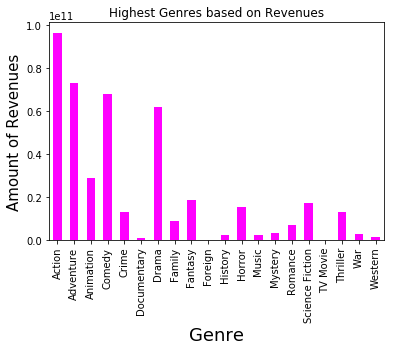

In [33]:
#Highest Genres
colors=['magenta']
movie.groupby('genres')['revenue'].sum().plot(kind='bar',title='Highest Genres based on Revenues',color=colors);
plt.xlabel('Genre',fontsize=18);
plt.ylabel('Amount of Revenues',fontsize=15);

In [ ]:
#Action is the highest genre for revenue

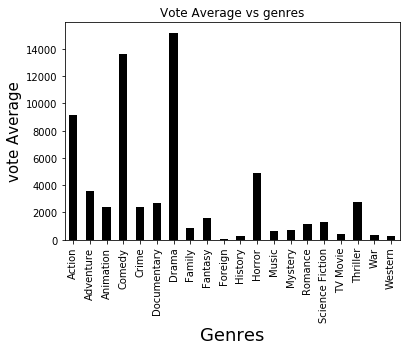

In [32]:
#Check the highest genres 
colors=['black']
movie.groupby('genres')['vote_average'].sum().plot(kind='bar',title='Vote Average vs genres',color=colors);
plt.xlabel('Genres',fontsize=18);
plt.ylabel('vote Average',fontsize=15);

In [ ]:
#Drama is the highest genre for vote average.

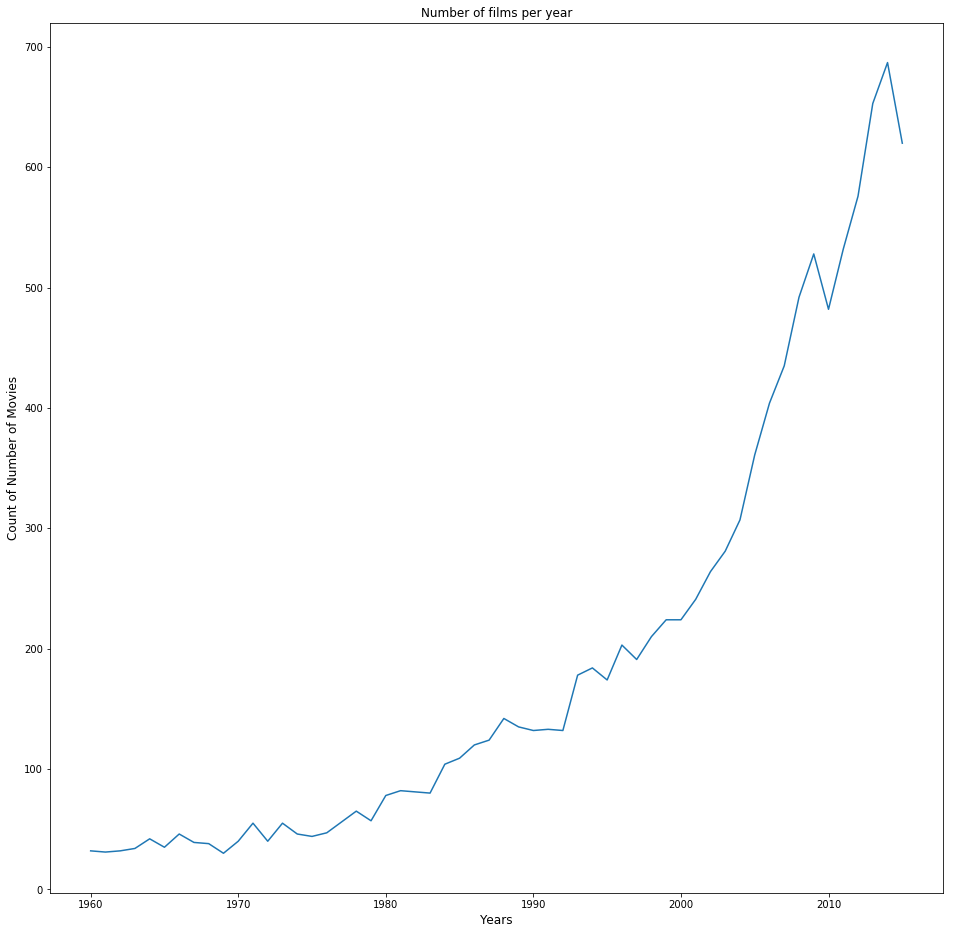

In [42]:
# We can check the year with the highest number of movies
data=movie.groupby('release_year').count()['genres'];
data.plot(title='Number of films per year',kind='line',figsize=(16,16));
plt.ylabel('Count of Number of Movies',fontsize=12);
plt.xlabel('Years',fontsize=12);

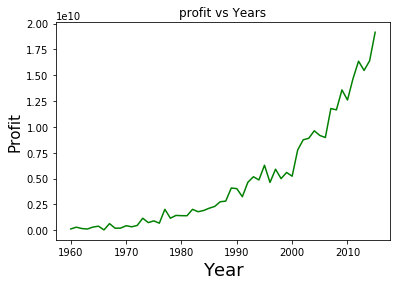

In [45]:
#Creating Plot total revenues Vs year
colors=['green']
movie.groupby('release_year')['profit'].sum().plot(kind='line',title='profit vs Years',color=colors);
plt.xlabel('Year',fontsize=18);
plt.ylabel('Profit',fontsize=15);

## Max Film based on Profit

In [44]:
#Getting the highest film based on profits over years:

def Afify_high (C1,C2,C3,C4):
    high_film= movie.loc[movie[C1] == movie[C1].max(),([C2,C3,C4])]
    return high_film
Afify_high('profit','release_year','original_title','revenue')

,release_year,original_title,revenue
1386,2009,Avatar,2781505847


## Highest Cast based on Profit

In [48]:
Afify_high('profit','release_year','cast','revenue')

,release_year,cast,revenue
1386,2009,Sam,2781505847


## Highlighting genres?

In [49]:
movie['genres']

0                 Action
1                 Action
2              Adventure
3                 Action
4                 Action
5                Western
6        Science Fiction
7                  Drama
8                 Family
9                 Comedy
10                Action
11       Science Fiction
12                 Drama
13                Action
14                Action
15                 Crime
16                 Crime
17       Science Fiction
18               Romance
19                   War
20                Action
21                Action
22                Action
23                 Drama
24                Comedy
25                Action
26                Comedy
27                 Crime
28                 Drama
29                Action
              ...       
10836             Comedy
10837                War
10838             Action
10839             Family
10840           Thriller
10841            Western
10842          Animation
10843          Adventure
10844          Adventure


## Highest film revenue

In [50]:
Afify_high('revenue','release_year','original_title','revenue_adj')

,release_year,original_title,revenue_adj
1386,2009,Avatar,2.827124e+09


## Highest Actor Vote

In [52]:
Afify_high('vote_average','release_year',"cast",'original_title')

,release_year,cast,original_title
3894,2011,Mark,The Story of Film: An Odyssey


## Best Genre Over Years

In [56]:
best_genre= movie.groupby('release_year')['profit'].max().reset_index()
best_genre= best_genre.merge(movie, on=['release_year','profit'])
best_genre.head(8)

,release_year,profit,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj,release_month
0,1960,48000000,12000000,60000000,Spartacus,Kirk,197,Action,2060-10-06,211,6.9,8.847561e+07,4.423780e+08,10
1,1961,211880014,4000000,215880014,One Hundred and One Dalmatians,Rod,79,Adventure,2061-01-25,913,6.6,2.917944e+07,1.574815e+09,1
2,1962,58500000,1100000,59600000,Dr. No,Sean,110,Adventure,2062-10-04,560,6.7,7.929294e+06,4.296236e+08,10
3,1963,76398765,2500000,78898765,From Russia With Love,Sean,115,Action,2063-10-11,458,6.7,1.780045e+07,5.617734e+08,10
4,1964,121400000,3500000,124900000,Goldfinger,Sean,110,Adventure,2064-09-17,602,7.0,2.460594e+07,8.780804e+08,9
5,1965,155014286,8200000,163214286,The Sound of Music,Julie,174,Drama,2065-03-02,620,7.2,5.674862e+07,1.129535e+09,3
6,1966,26236689,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth,131,Drama,2066-06-21,74,7.5,5.038511e+07,2.266436e+08,6
7,1967,201843612,4000000,205843612,The Jungle Book,Phil,78,Family,2067-10-18,928,7.0,2.614705e+07,1.345551e+09,10


## Visualization of Best cast Over Years

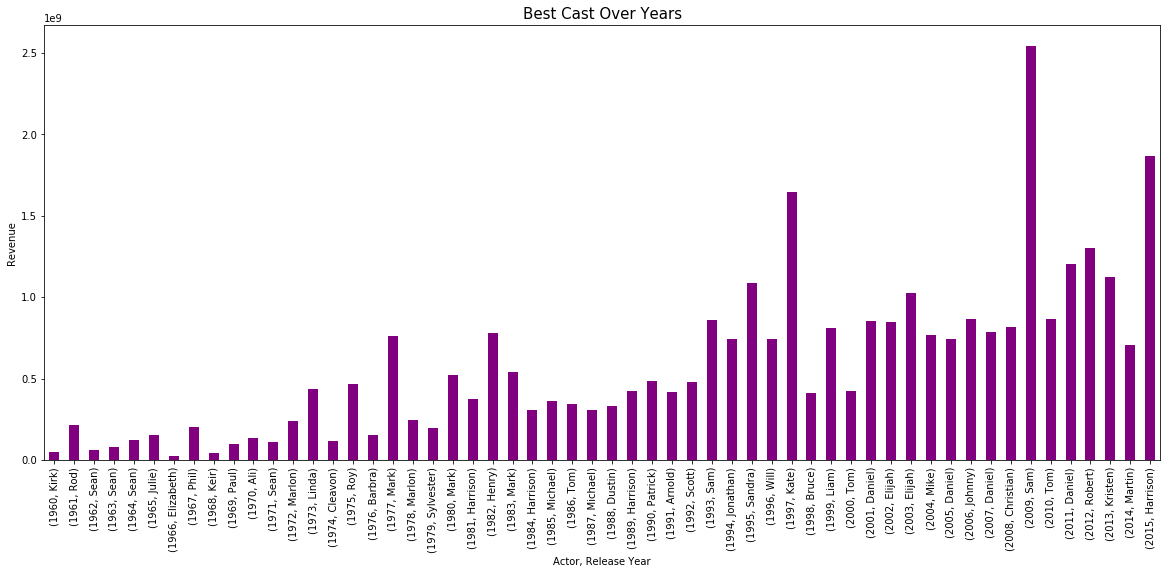

In [57]:
cast_best = best_genre.groupby(['release_year','cast'])['profit'].max().plot(kind = 'bar' , figsize= (20,8), color = 'purple')
plt.title('Best Cast Over Years', fontdict={'size':15})
#Adding x,y labels
plt.xlabel('Actor, Release Year')
plt.ylabel('Revenue')
plt.show()

In [ ]:
#Sam Worthington is the highest actor

# Conclusions

## Question 1
###### Highest Month based on profits is : June (Bar graph)
##### Highest Genre based on profits and revenues is : Action.
##### Highest Genre based on Vote Average is: Drama.
##### Highest Number of films per year is in : 2015
##### Highest year based on profits is: 2015
##### Highest film based on profits is: Avatar.
##### Highest Cast based on profit is: Sam Worthington

## Question 2

#### Highest actor for vote average is Mark due to ( The Story of Film: An Odyssey)
#### Best cast is Sam Worthington ( 2009) Bar chart.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])